In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [1]:
data = '/content/drive/MyDrive/폴리텍전남캠퍼스/data/bmi.csv'

In [2]:
# 1 .문제정의
# 머신러닝을 통해서 해결하고 싶은 대상을 찾기
# 어떻게 해결할지 정리

### KNN 모델을 이용해서 BMI 데이터 학습
- BMI데이터 구성
 - 특징: 성별,몸무게,키
 - 라벨: 비만도(6가지)
    - 0 : 심한 저체중
    - 1 : 저체중
    - 2 : 정상
    - 3 : 과체중
    - 4 : 비만
    - 5 : 고도비만
 - 데이터수:500

In [3]:
# 데이터 가져오기
import pandas as pd
bmi = pd.read_csv(data)
bmi

,Gender,Height,Weight,Index
0,Male,174,96,4
1,Male,189,87,2
2,Female,185,110,4
3,Female,195,104,3
4,Male,149,61,3
...,...,...,...,...
495,Female,150,153,5
496,Female,184,121,4
497,Female,141,136,5
498,Male,150,95,5


In [4]:
bmi.head() # 기본 5개

,Gender,Height,Weight,Index
0,Male,174,96,4
1,Male,189,87,2
2,Female,185,110,4
3,Female,195,104,3
4,Male,149,61,3


In [5]:
bmi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Gender  500 non-null    object
 1   Height  500 non-null    int64 
 2   Weight  500 non-null    int64 
 3   Index   500 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 15.8+ KB


In [7]:
# 통계값 출력
# 데이터가 숫자로 되어있는 특징들만 확인가능
bmi.describe()

,Height,Weight,Index
count,500.000000,500.000000,500.000000
mean,169.944000,106.000000,3.748000
std,16.375261,32.382607,1.355053
min,140.000000,50.000000,0.000000
25%,156.000000,80.000000,3.000000
50%,170.500000,106.000000,4.000000
75%,184.000000,136.000000,5.000000
max,199.000000,160.000000,5.000000


In [11]:
# Label 라벨에는 어떤 클래스가 있는지 확인
# unique() 중복제거
bmi['Index'].unique()
# Extreme Obesity : 고도비만  5
# Obesity : 비만 4
# Normal : 정상 3
# Overweight : 과체중 2
# Weak : 저체중 1
# Extremely Weak : 심각한 저체중 0

array([4, 2, 3, 5, 1, 0])

In [21]:
bmi['Weight']

(0       96
 1       87
 2      110
 3      104
 4       61
       ... 
 495    153
 496    121
 497    136
 498     95
 499    131
 Name: Weight, Length: 500, dtype: int64,
 0      174
 1      189
 2      185
 3      195
 4      149
       ... 
 495    150
 496    184
 497    141
 498    150
 499    173
 Name: Height, Length: 500, dtype: int64)

In [25]:
# bmi['Index']
bmi[bmi["Index"] == 5]

,Gender,Height,Weight,Index
6,Male,147,92,5
7,Male,154,111,5
15,Female,153,107,5
16,Female,157,110,5
17,Male,140,129,5
...,...,...,...,...
494,Male,152,98,5
495,Female,150,153,5
497,Female,141,136,5
498,Male,150,95,5


In [26]:
# 시각화
import matplotlib.pyplot as plt

def myScatter(label, color):
  tmp = bmi[bmi["Index"] == label]
  plt.scatter(tmp["Weight"], tmp["Height"], c=color, label=label)

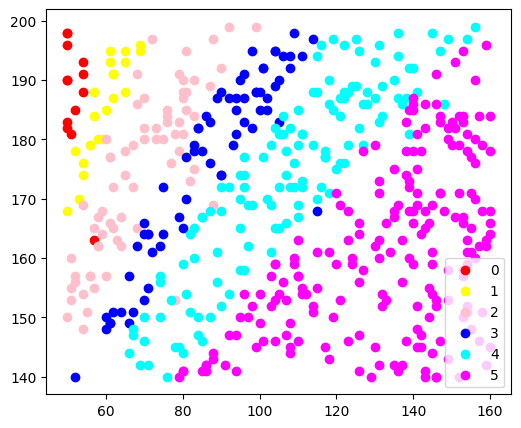

In [30]:
# 시각화
plt.figure(figsize=(6,5)) # 그래프 크기
myScatter(0,'red')
myScatter(1,'yellow')
myScatter(2,'pink')
myScatter(3,'blue')
myScatter(4,'cyan')
myScatter(5,'magenta')

plt.legend()

In [31]:
# 데이터 분류
# train, test ( 7:3 또는 8:2)
# 슬라이스 변수[시작:끝] , 변수[시작:끝,시작:끝]
# 변수.iloc[시작:끝] , 변수.iloc[시작:끝,시작:끝]
train = bmi.iloc[0:400] # 0 ~ 399 400개
test = bmi.iloc[400:] # 400 ~ 끝가지 100개

In [32]:
print('bmi 크기 : ', bmi.shape) # 500
print('train 크기 : ', train.shape) # 400
print('test 크기 : ', test.shape) # 100

bmi 크기 :  (500, 4)
train 크기 :  (400, 4)
test 크기 :  (100, 4)


In [33]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Gender  400 non-null    object
 1   Height  400 non-null    int64 
 2   Weight  400 non-null    int64 
 3   Index   400 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 12.6+ KB


In [34]:
# train -> 문제,답지 나누기
# X_train(키,몸무게), y_train(비만도)
# test -> 문제,답지 나누기
# X_test(키,몸무게), y_test(비만도)\
X_train = train.iloc[:,1:3] # 문제
y_train = train.iloc[:,3]   # 답지
X_test = test.iloc[:,1:3]   # 문제
y_test = test.iloc[:,3]     # 답지

In [35]:
X_train.shape,y_train.shape

((400, 2), (400,))

In [36]:
print('bmi ',bmi.shape)
print('train ',train.shape)
print('X_train ',X_train.shape)
print('y_train ',y_train.shape)

bmi  (500, 4)
train  (400, 4)
X_train  (400, 2)
y_train  (400,)


In [38]:
X_train.head()

,Height,Weight
0,174,96
1,189,87
2,185,110
3,195,104
4,149,61


In [39]:
y_train.head()

0    4
1    2
2    4
3    3
4    3
Name: Index, dtype: int64

In [40]:
# 모델 생성
# KNN
# 머신러닝 모델 만들기
from sklearn.neighbors import KNeighborsClassifier
# 모델 만들기
bmi_knn = KNeighborsClassifier(n_neighbors=1)

In [41]:
# 모델 학습(fit)
# 모델.fit(문제,답지)
bmi_knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [42]:
# 모델 예측
# 모델.predict(문제)
pre = bmi_knn.predict(X_test)
# 100개 문제데이터의 답지가 pre로 저장


In [43]:
pre

array([3, 4, 2, 4, 4, 5, 2, 5, 5, 5, 1, 4, 5, 5, 5, 4, 5, 2, 5, 2, 1, 5,
       4, 4, 1, 1, 5, 4, 2, 4, 3, 5, 5, 5, 2, 5, 5, 5, 1, 5, 4, 2, 5, 5,
       4, 5, 4, 4, 5, 5, 5, 3, 5, 0, 2, 3, 4, 2, 2, 5, 4, 5, 1, 5, 2, 5,
       3, 5, 5, 3, 5, 5, 2, 4, 3, 4, 5, 2, 2, 5, 5, 4, 5, 4, 4, 4, 5, 2,
       4, 5, 2, 5, 0, 2, 5, 5, 4, 5, 5, 5])

In [44]:
y_test

400    3
401    4
402    2
403    4
404    4
      ..
495    5
496    4
497    5
498    5
499    5
Name: Index, Length: 100, dtype: int64

In [45]:
# 모델 평가
# accuracy_score(예측값,실제값) 0~1
from sklearn.metrics import accuracy_score
score = accuracy_score(pre,y_test)
print('예측률 ', score)


예측률  0.9


In [48]:
# [[키,몸무게]]
true_pre = bmi_knn.predict([[170,80]])
true_pre[0] # 0 ~ 5

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


3